Step 1: Default Model (n_estimators = 10)
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Step 2: Fine-tuned Model
Best Accuracy: 1.0
Best n_estimators: 1
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


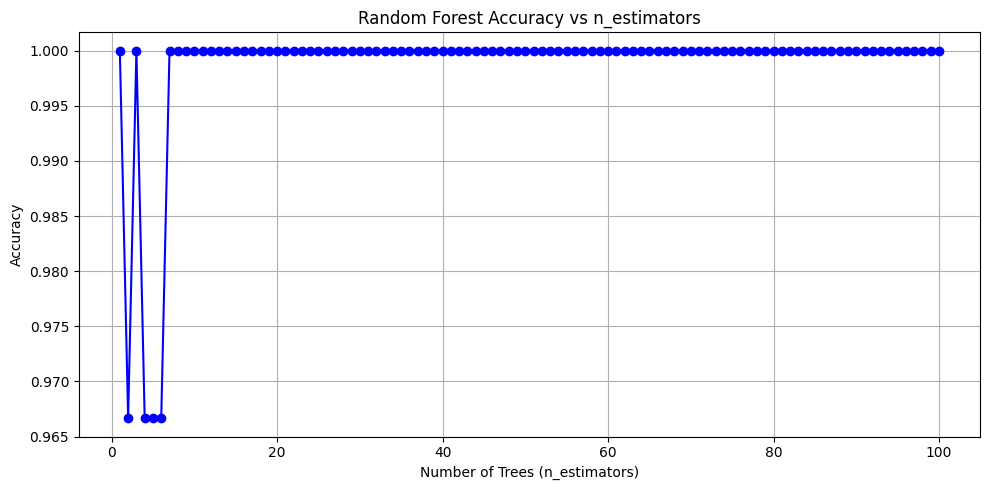

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset from CSV file
df = pd.read_csv('/content/iris (2).csv')  # Ensure this file is in your working directory

# Separate features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Train a Random Forest Classifier with n_estimators = 10
clf_10 = RandomForestClassifier(n_estimators=10, random_state=42)
clf_10.fit(X_train, y_train)
y_pred_10 = clf_10.predict(X_test)
score_10 = accuracy_score(y_test, y_pred_10)
conf_matrix_10 = confusion_matrix(y_test, y_pred_10)

print("Step 1: Default Model (n_estimators = 10)")
print(f"Accuracy: {score_10}")
print("Confusion Matrix:\n", conf_matrix_10)

# 2. Fine-tune number of trees in the classifier
scores = []
n_estimators_range = range(1, 101)

for n in n_estimators_range:
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

# Find best score and corresponding number of trees
best_score = max(scores)
best_n = n_estimators_range[scores.index(best_score)]

# Train with best_n again for confusion matrix
clf_best = RandomForestClassifier(n_estimators=best_n, random_state=42)
clf_best.fit(X_train, y_train)
y_pred_best = clf_best.predict(X_test)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

print("\nStep 2: Fine-tuned Model")
print(f"Best Accuracy: {best_score}")
print(f"Best n_estimators: {best_n}")
print("Confusion Matrix:\n", conf_matrix_best)

# 3. Plot accuracy vs number of trees
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_range, scores, marker='o', color='blue')
plt.title("Random Forest Accuracy vs n_estimators")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()
